1. DATA MINING

Import libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
%autosave 1

Autosaving every 1 seconds


Read train and test data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print(train.head())
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Drop ID column

In [3]:
print("The train shape before dropping ID feature is {}".format(train.shape))
print("The test shape before dropping ID feature is {}".format(test.shape))
train_ID = train["Id"]
test_ID = test["Id"]
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)
print("\nThe train shape after dropping ID feature is {}".format(train.shape))
print("The test shape after dropping ID feature is {}".format(test.shape))

The train shape before dropping ID feature is (1460, 81)
The test shape before dropping ID feature is (1459, 80)

The train shape after dropping ID feature is (1460, 80)
The test shape after dropping ID feature is (1459, 79)


2. DATA CLEANING

Identify missing values

In [4]:
all = pd.concat([train, test], ignore_index=True)
#all.drop(["SalePrice"], axis=1, inplace=True)
print(all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [5]:
all_isnull_count = all.isnull().sum().sort_values(ascending=False)
all_isnull_count = all_isnull_count[all_isnull_count>0]
all_isnull_perc = (all_isnull_count*100/len(all))
print(pd.concat([all_isnull_count, all_isnull_perc], axis=1))

                 0      1
PoolQC        2909 99.657
MiscFeature   2814 96.403
Alley         2721 93.217
Fence         2348 80.439
MasVnrType    1766 60.500
SalePrice     1459 49.983
FireplaceQu   1420 48.647
LotFrontage    486 16.650
GarageFinish   159  5.447
GarageQual     159  5.447
GarageCond     159  5.447
GarageYrBlt    159  5.447
GarageType     157  5.379
BsmtCond        82  2.809
BsmtExposure    82  2.809
BsmtQual        81  2.775
BsmtFinType2    80  2.741
BsmtFinType1    79  2.706
MasVnrArea      23  0.788
MSZoning         4  0.137
BsmtHalfBath     2  0.069
Utilities        2  0.069
BsmtFullBath     2  0.069
Functional       2  0.069
Exterior2nd      1  0.034
Exterior1st      1  0.034
GarageArea       1  0.034
GarageCars       1  0.034
SaleType         1  0.034
KitchenQual      1  0.034
BsmtFinSF1       1  0.034
Electrical       1  0.034
BsmtFinSF2       1  0.034
BsmtUnfSF        1  0.034
TotalBsmtSF      1  0.034


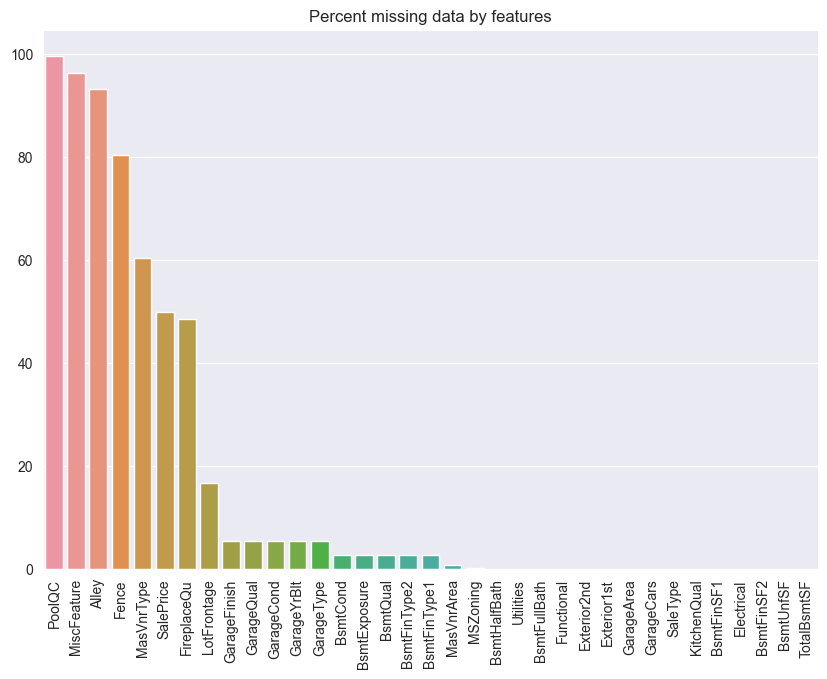

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
plt.xticks(rotation="vertical")
sns.barplot(x=all_isnull_perc.index, y=all_isnull_perc)
plt.title("Percent missing data by features")
plt.show()


Correlation Matrix

<Axes: >

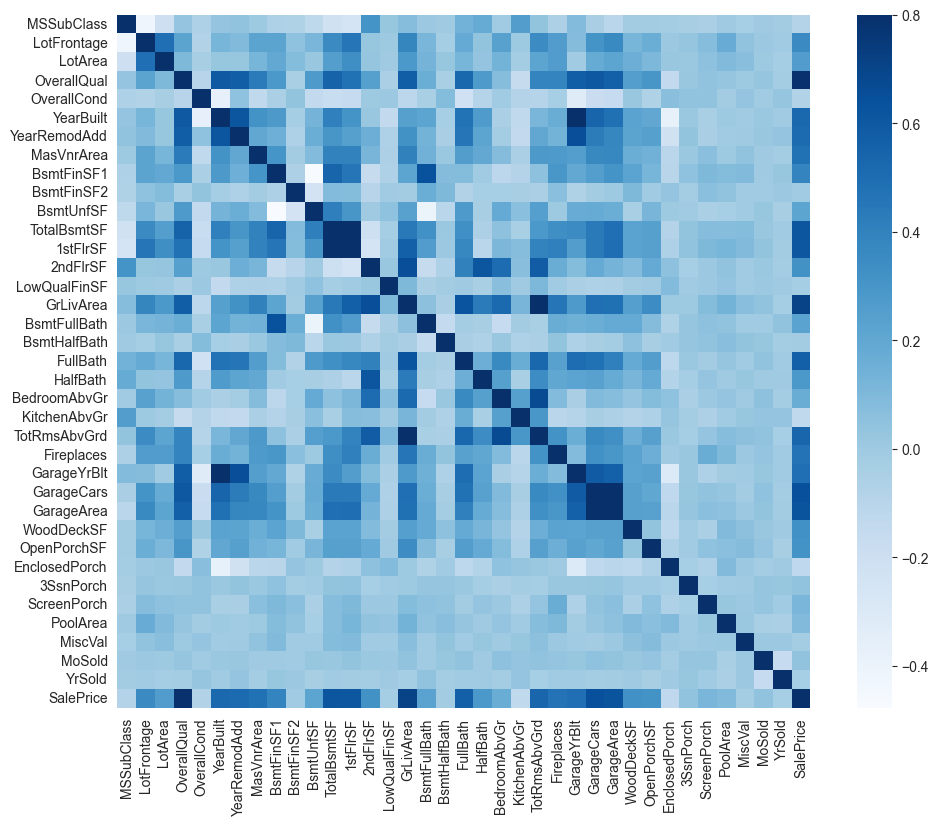

In [7]:
numcols = all.select_dtypes(include=[np.number])  # Mantener solo las columnas numéricas
corrmat = numcols.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, cmap="Blues", square=True)

Now, we going to each them. First PoolQC feature

In [8]:
print(all.PoolQC.value_counts())

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64


In [9]:
# Imputing Nan with "None"
all.PoolQC.fillna("None", inplace=True)
print(all.PoolQC.value_counts())
print(all.PoolQC.tail())

PoolQC
None    2909
Ex         4
Gd         4
Fa         2
Name: count, dtype: int64
2914    None
2915    None
2916    None
2917    None
2918    None
Name: PoolQC, dtype: object


In [10]:
print(all.loc[all[(all.PoolArea != 0) & (all.PoolQC == "None")].index, ["PoolQC", "PoolArea", "OverallQual"]])
all.loc[2420, "PoolQC"]="Fa"
all.loc[2503, "PoolQC"]="Gd"
all.loc[2599, "PoolQC"]="Fa"
print(all.loc[[2420,2503,2599], ["PoolQC", "PoolArea", "OverallQual"]])

     PoolQC  PoolArea  OverallQual
2420   None       368            4
2503   None       444            6
2599   None       561            3
     PoolQC  PoolArea  OverallQual
2420     Fa       368            4
2503     Gd       444            6
2599     Fa       561            3


MiscFeature

In [11]:
print(all.MiscFeature.value_counts())
all.MiscFeature.fillna("None", inplace=True)

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


Alley

In [12]:
print(all.Alley.value_counts())
all.Alley.fillna("None", inplace=True)

Alley
Grvl    120
Pave     78
Name: count, dtype: int64


Fence

In [13]:
print(all.Fence.value_counts())
all.Fence.fillna("None", inplace=True)

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64


MasVnrType

In [14]:
print(all.MasVnrType.value_counts())
all.MasVnrType.fillna("None", inplace=True)

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64


FireplaceQu

In [15]:
print(all.FireplaceQu.value_counts())
all.FireplaceQu.fillna("None", inplace=True)

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64


In [16]:
print(all.loc[all[(all.Fireplaces != 0) & (all.FireplaceQu == "None")].index, ["Fireplaces", "FireplaceQu", "OverallQual"]])

Empty DataFrame
Columns: [Fireplaces, FireplaceQu, OverallQual]
Index: []


LotFrontage

In [17]:
print(all.LotFrontage.describe())
print(all.LotFrontage.head(10))

count   2433.000
mean      69.306
std       23.345
min       21.000
25%       59.000
50%       68.000
75%       80.000
max      313.000
Name: LotFrontage, dtype: float64
0   65.000
1   80.000
2   68.000
3   60.000
4   84.000
5   85.000
6   75.000
7      NaN
8   51.000
9   50.000
Name: LotFrontage, dtype: float64


In [18]:
all.LotFrontage.fillna(all.LotFrontage.mean(), inplace=True)
print(all.LotFrontage.head(10))

0   65.000
1   80.000
2   68.000
3   60.000
4   84.000
5   85.000
6   75.000
7   69.306
8   51.000
9   50.000
Name: LotFrontage, dtype: float64


Garage Families

In [19]:
garage_int = ["GarageYrBlt", "GarageCars", "GarageArea"]
print(all[garage_int].describe())
garage_obj = ["GarageFinish", "GarageQual", "GarageCond", "GarageType"]
for x in garage_obj: print(all[x].value_counts())

       GarageYrBlt  GarageCars  GarageArea
count     2760.000    2918.000    2918.000
mean      1978.113       1.767     472.875
std         25.574       0.762     215.395
min       1895.000       0.000       0.000
25%       1960.000       1.000     320.000
50%       1979.000       2.000     480.000
75%       2002.000       2.000     576.000
max       2207.000       5.000    1488.000
GarageFinish
Unf    1230
RFn     811
Fin     719
Name: count, dtype: int64
GarageQual
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
GarageCond
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64
GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


In [20]:
all.GarageYrBlt[all.GarageYrBlt == 2207] = 2007

C:\Users\kevin\AppData\Local\Temp\ipykernel_9780\614348677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all.GarageYrBlt[all.GarageYrBlt == 2207] = 2007


In [21]:
for x in garage_int: all[x].fillna(0, inplace=True)
for x in garage_obj: all[x].fillna("None", inplace=True)

In [22]:
print(all.loc[all[(all.GarageYrBlt == 0) & (all.GarageCars != 0)].index, garage_int+["GarageFinish","GarageType"]])
print(all.loc[all[(all.GarageFinish == "None") & (all.GarageType != "None")].index, garage_int+["GarageFinish","GarageType"]])
#No hay consistencia en los índices 2126, 2576. Por lo tanto asumiremos que no hay garages en estos dos caso.

      GarageYrBlt  GarageCars  GarageArea GarageFinish GarageType
2126        0.000       1.000     360.000         None     Detchd
      GarageYrBlt  GarageCars  GarageArea GarageFinish GarageType
2126        0.000       1.000     360.000         None     Detchd
2576        0.000       0.000       0.000         None     Detchd


In [23]:
all.loc[[2126,2576], garage_int+garage_obj] = [0,0,0,"None","None","None","None"]
all.loc[[2126,2576], garage_int+garage_obj]

,GarageYrBlt,GarageCars,GarageArea,GarageFinish,GarageQual,GarageCond,GarageType
2126,0.000,0.000,0.000,None,None,None,None
2576,0.000,0.000,0.000,None,None,None,None


In [24]:
for x in garage_int: print(len(all[x][all[x]==0]))
for x in garage_obj: print(len(all[x][all[x]=="None"]))

159
159
159
159
159
159
159


Basement families

In [25]:
bsmt_obj = ["BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinType2"]
bsmt_int = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

print(all[bsmt_int].describe())
for x in bsmt_obj: print(all[x].value_counts())

       BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
count    2918.000    2918.000   2918.000     2918.000
mean      441.423      49.582    560.772     1051.778
std       455.611     169.206    439.544      440.766
min         0.000       0.000      0.000        0.000
25%         0.000       0.000    220.000      793.000
50%       368.500       0.000    467.000      989.500
75%       733.000       0.000    805.500     1302.000
max      5644.000    1526.000   2336.000     6110.000
BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [26]:
print(all[bsmt_int].head())
#print(all.loc[all[bsmt_int][all[bsmt_int].isnull()==True].index,bsmt_int])
print(all[bsmt_int].isnull().apply(lambda x: x[x==True].index, axis=0))
print(all.loc[2120,bsmt_int])

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0     706.000       0.000    150.000      856.000
1     978.000       0.000    284.000     1262.000
2     486.000       0.000    434.000      920.000
3     216.000       0.000    540.000      756.000
4     655.000       0.000    490.000     1145.000
   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0        2120        2120       2120         2120
BsmtFinSF1     NaN
BsmtFinSF2     NaN
BsmtUnfSF      NaN
TotalBsmtSF    NaN
Name: 2120, dtype: object


In [27]:
#Imputamos con 0 los valores nulos
for x in bsmt_int: all[x].fillna(0, inplace=True)
for x in bsmt_obj: all[x].fillna("None", inplace=True)

In [28]:
print(all.loc[all[(all.BsmtFinType1 != "None") & (all.BsmtExposure == "None")].index, bsmt_obj])
print(all.loc[all[(all.BsmtFinType1 != "None") & (all.BsmtCond == "None")].index, bsmt_obj])
print(all.loc[all[(all.BsmtFinType1 != "None") & (all.BsmtQual == "None")].index, bsmt_obj])
print(all.loc[all[(all.BsmtFinType1 != "None") & (all.BsmtFinType2 == "None")].index, bsmt_obj])

     BsmtExposure BsmtCond BsmtQual BsmtFinType1 BsmtFinType2
948          None       TA       Gd          Unf          Unf
1487         None       TA       Gd          Unf          Unf
2348         None       TA       Gd          Unf          Unf
     BsmtExposure BsmtCond BsmtQual BsmtFinType1 BsmtFinType2
2040           Mn     None       Gd          GLQ          Rec
2185           No     None       TA          BLQ          Unf
2524           Av     None       TA          ALQ          Unf
     BsmtExposure BsmtCond BsmtQual BsmtFinType1 BsmtFinType2
2217           No       Fa     None          Unf          Unf
2218           No       TA     None          Unf          Unf
    BsmtExposure BsmtCond BsmtQual BsmtFinType1 BsmtFinType2
332           No       TA       Gd          GLQ         None


In [29]:
print(all.loc[all[(all.BsmtExposure == "No") & (all.BsmtCond == "TA") & (all.BsmtQual == "Gd") & (all.BsmtFinType1 == "GLQ")].index, "BsmtFinType2"].mode())
print("\n")
print(all.loc[all[(all.BsmtExposure == "No") & (all.BsmtCond == "TA") & (all.BsmtFinType1 == "Unf") & (all.BsmtFinType2 == "Unf")].index, "BsmtQual"].mode())
print(all.loc[all[(all.BsmtExposure == "No") & (all.BsmtCond == "Fa") & (all.BsmtFinType1 == "Unf") & (all.BsmtFinType2 == "Unf")].index, "BsmtQual"].mode())
print("\n")
print(all.loc[all[(all.BsmtExposure == "Mn") & (all.BsmtQual == "Gd") & (all.BsmtFinType1 == "GLQ") & (all.BsmtFinType2 == "Unf")].index, "BsmtCond"].mode())
print(all.loc[all[(all.BsmtExposure == "No") & (all.BsmtQual == "TA") & (all.BsmtFinType1 == "BLQ") & (all.BsmtFinType2 == "Unf")].index, "BsmtCond"].mode())
print(all.loc[all[(all.BsmtExposure == "Av") & (all.BsmtQual == "TA") & (all.BsmtFinType1 == "ALQ") & (all.BsmtFinType2 == "Unf")].index, "BsmtCond"].mode())
print("\n")
print(all.loc[all[(all.BsmtCond == "TA") & (all.BsmtQual == "Gd") & (all.BsmtFinType1 == "Unf") & (all.BsmtFinType2 == "Unf")].index, "BsmtExposure"].mode())


0    Unf
Name: BsmtFinType2, dtype: object


0    TA
Name: BsmtQual, dtype: object
0    TA
Name: BsmtQual, dtype: object


0    TA
Name: BsmtCond, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    TA
Name: BsmtCond, dtype: object


0    No
Name: BsmtExposure, dtype: object


In [30]:
all.loc[332, "BsmtFinType2"] = "Unf"
all.loc[[2217,2218], "BsmtQual"] = "TA"
all.loc[[2040,2185,2524], "BsmtCond"] = "TA"
all.loc[[948,1487,2348], "BsmtExposure"] = "No"

MasVnrArea

In [31]:
print(all.MasVnrArea.describe())
print(all.MasVnrArea.tail())

count   2896.000
mean     102.201
std      179.334
min        0.000
25%        0.000
50%        0.000
75%      164.000
max     1600.000
Name: MasVnrArea, dtype: float64
2914    0.000
2915    0.000
2916    0.000
2917    0.000
2918   94.000
Name: MasVnrArea, dtype: float64


In [32]:
index_MasVnrArea_nan = all[["MasVnrArea"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_MasVnrArea_nan for num in lista1]
print(all.loc[lista2, ["MasVnrArea", "MasVnrType"]])

      MasVnrArea MasVnrType
234          NaN       None
529          NaN       None
650          NaN       None
936          NaN       None
973          NaN       None
977          NaN       None
1243         NaN       None
1278         NaN       None
1691         NaN       None
1706         NaN       None
1882         NaN       None
1992         NaN       None
2004         NaN       None
2041         NaN       None
2311         NaN       None
2325         NaN       None
2340         NaN       None
2349         NaN       None
2368         NaN       None
2592         NaN       None
2657         NaN       None
2686         NaN       None
2862         NaN       None


In [33]:
#Imputin missing values with 0
all.MasVnrArea.fillna(0, inplace=True)

MSZoning

In [34]:
print(all.MSZoning.value_counts())

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


In [35]:
index_MasVnrArea_nan = all[["MSZoning"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_MasVnrArea_nan for num in lista1]
print(all.loc[lista2, ["MSZoning", "MSSubClass", "Street", "LotShape"]])

     MSZoning  MSSubClass Street LotShape
1915      NaN          30   Grvl      Reg
2216      NaN          20   Pave      Reg
2250      NaN          70   Pave      IR1
2904      NaN          20   Pave      Reg


In [36]:
print(all.loc[all[(all.MSSubClass == 30) & (all.Street == "Grvl") & (all.LotShape == "Reg")].index, "MSZoning"].mode())
print(all.loc[all[(all.MSSubClass == 20) & (all.Street == "Pave") & (all.LotShape == "Reg")].index, "MSZoning"].mode())
print(all.loc[all[(all.MSSubClass == 70) & (all.Street == "Pave") & (all.LotShape == "IR1")].index, "MSZoning"].mode())

0    C (all)
Name: MSZoning, dtype: object
0    RL
Name: MSZoning, dtype: object
0    RL
Name: MSZoning, dtype: object


In [37]:
all.loc[1915, "MSZoning"] = "C (all)"
all.loc[2216, "MSZoning"] = "RL"
all.loc[2250, "MSZoning"] = "RL"
all.loc[2904, "MSZoning"] = "RL"


Utilities

In [38]:
print(all.Utilities.value_counts())

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64


In [39]:
index_utilities_nan = all[["Utilities"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_utilities_nan for num in lista1]
print(all.loc[lista2, ["Utilities", "MSSubClass", "Street", "LotShape"]])

     Utilities  MSSubClass Street LotShape
1915       NaN          30   Grvl      Reg
1945       NaN          20   Pave      IR1


In [40]:
print(all.loc[all[(all.MSSubClass == 30) & (all.Street == "Grvl") & (all.LotShape == "Reg")].index, "Utilities"].mode())
print(all.loc[all[(all.MSSubClass == 20) & (all.Street == "Pave") & (all.LotShape == "Reg")].index, "Utilities"].mode())

0    AllPub
Name: Utilities, dtype: object
0    AllPub
Name: Utilities, dtype: object


In [41]:
all.loc[[1915,1945], "Utilities"] = "AllPub"


BsmtFullBath BsmtHalfBath

In [42]:
print(all.BsmtFullBath.describe())
print(all.BsmtFullBath.value_counts())
print(all.BsmtHalfBath.describe())
print(all.BsmtHalfBath.value_counts())

count   2917.000
mean       0.430
std        0.525
min        0.000
25%        0.000
50%        0.000
75%        1.000
max        3.000
Name: BsmtFullBath, dtype: float64
BsmtFullBath
0.000    1705
1.000    1172
2.000      38
3.000       2
Name: count, dtype: int64
count   2917.000
mean       0.061
std        0.246
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        2.000
Name: BsmtHalfBath, dtype: float64
BsmtHalfBath
0.000    2742
1.000     171
2.000       4
Name: count, dtype: int64


In [43]:
index_bsmtfullbath_nan = all[["BsmtFullBath"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_bsmtfullbath_nan for num in lista1]
print(all.loc[lista2, ["BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "BsmtFinSF2", "TotalBsmtSF"]])

      BsmtFullBath  BsmtHalfBath  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF
2120           NaN           NaN       0.000       0.000        0.000
2188           NaN           NaN       0.000       0.000        0.000


In [44]:
print(all.loc[all[(all.BsmtFinSF1 == 0) & (all.BsmtFinSF2 == 0) & (all.TotalBsmtSF == 0)].index, ["BsmtFullBath", "BsmtHalfBath"]].mode())

   BsmtFullBath  BsmtHalfBath
0         0.000         0.000


In [45]:
all["BsmtFullBath"].fillna(0, inplace=True)
all["BsmtHalfBath"].fillna(0, inplace=True)

Functional

In [46]:
print(all.Functional.value_counts())

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64


In [47]:
index_functional_nan = all[["Functional"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_functional_nan for num in lista1]
print(all.loc[lista2, ["Functional", "MSSubClass", "MSZoning", "Street", "Alley"]])

     Functional  MSSubClass MSZoning Street Alley
2216        NaN          20       RL   Pave  None
2473        NaN          50       RM   Pave  Grvl


In [48]:
print(all.loc[all[(all.MSSubClass == 20) & (all.MSZoning == "RL") & (all.Street == "Pave") & (all.Alley == "None")].index, "Functional"].mode())
print(all.loc[all[(all.MSSubClass == 50) & (all.MSZoning == "RM") & (all.Street == "Pave") & (all.Alley == "Grvl")].index, "Functional"].mode())

0    Typ
Name: Functional, dtype: object
0    Typ
Name: Functional, dtype: object


In [49]:
all.loc[[2216,2473], "Functional"] = "Typ"

Electrical

In [50]:
print(all.Electrical.value_counts())

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64


In [51]:
index_electrical_nan = all[["Electrical"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_electrical_nan for num in lista1]
print(all.loc[lista2, ["Electrical", "MSSubClass", "MSZoning", "Street", "Alley"]])

     Electrical  MSSubClass MSZoning Street Alley
1379        NaN          80       RL   Pave  None


In [52]:
print(all.loc[all[(all.MSSubClass == 80) & (all.MSZoning == "RL") & (all.Street == "Pave") & (all.Alley == "None")].index, "Electrical"].mode())

0    SBrkr
Name: Electrical, dtype: object


In [53]:
all.loc[1379, "Electrical"] = "SBrkr"

SaleType

In [54]:
print(all.SaleType.value_counts())

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64


In [55]:
index_saletype_nan = all[["SaleType"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_saletype_nan for num in lista1]
print(all.loc[lista2, ["SaleType", "MSSubClass", "MSZoning", "Street", "Alley"]])

     SaleType  MSSubClass MSZoning Street Alley
2489      NaN          20       RL   Pave  None


In [56]:
print(all.loc[all[(all.MSSubClass == 20) & (all.MSZoning == "RL") & (all.Street == "Pave") & (all.Alley == "None")].index, "SaleType"].mode())

0    WD
Name: SaleType, dtype: object


In [57]:
all.loc[2489, "SaleType"] = "WD"

Exterior1st Exterior2nd

In [58]:
print(all.Exterior1st.value_counts())
print(all.Exterior2nd.value_counts())

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64


In [59]:
index_exterior_nan = all[["Exterior1st"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_exterior_nan for num in lista1]
print(all.loc[lista2, ["Exterior1st", "Exterior2nd", "MSSubClass", "MSZoning", "Street", "Alley"]])

     Exterior1st Exterior2nd  MSSubClass MSZoning Street Alley
2151         NaN         NaN          30       RL   Pave  None


In [60]:
print(all.loc[all[(all.MSSubClass == 30) & (all.MSZoning == "RL") & (all.Street == "Pave") & (all.Alley == "None")].index, ["Exterior1st", "Exterior2nd"]].mode())

  Exterior1st Exterior2nd
0     Wd Sdng     Wd Sdng


In [61]:
all.loc[2151, ["Exterior1st", "Exterior2nd"]] = ["Wd Sdng", "Wd Sdng"]

KitchenQual

In [62]:
print(all.KitchenQual.value_counts())

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64


In [63]:
index_kitchen_nan = all[["KitchenQual"]].isnull().apply(lambda x: x[x==True].index, axis=0).values.reshape(1,-1).tolist()
lista2 = [num for lista1 in index_kitchen_nan for num in lista1]
print(all.loc[lista2, ["KitchenQual","KitchenAbvGr", "MSSubClass", "MSZoning", "Street", "Alley"]])

     KitchenQual  KitchenAbvGr  MSSubClass MSZoning Street Alley
1555         NaN             1          50       RL   Pave  None


In [64]:
print(all.loc[all[(all.KitchenAbvGr == 1) & (all.MSSubClass == 50) & (all.MSZoning == "RL") & (all.Street == "Pave") & (all.Alley == "None")].index, "KitchenQual"].mode())

0    TA
Name: KitchenQual, dtype: object


In [65]:
all.loc[1555, "KitchenQual"] = "TA"

Identify and remove outliers

We going to graph all features vs SalePrices

In [66]:
numcols = all.select_dtypes(include=[np.number]).drop(["SalePrice"], axis=1)
print(len(numcols.columns.tolist()))
objcols = all.select_dtypes(include=["object"])
print(len(objcols.columns.tolist()))

36
43


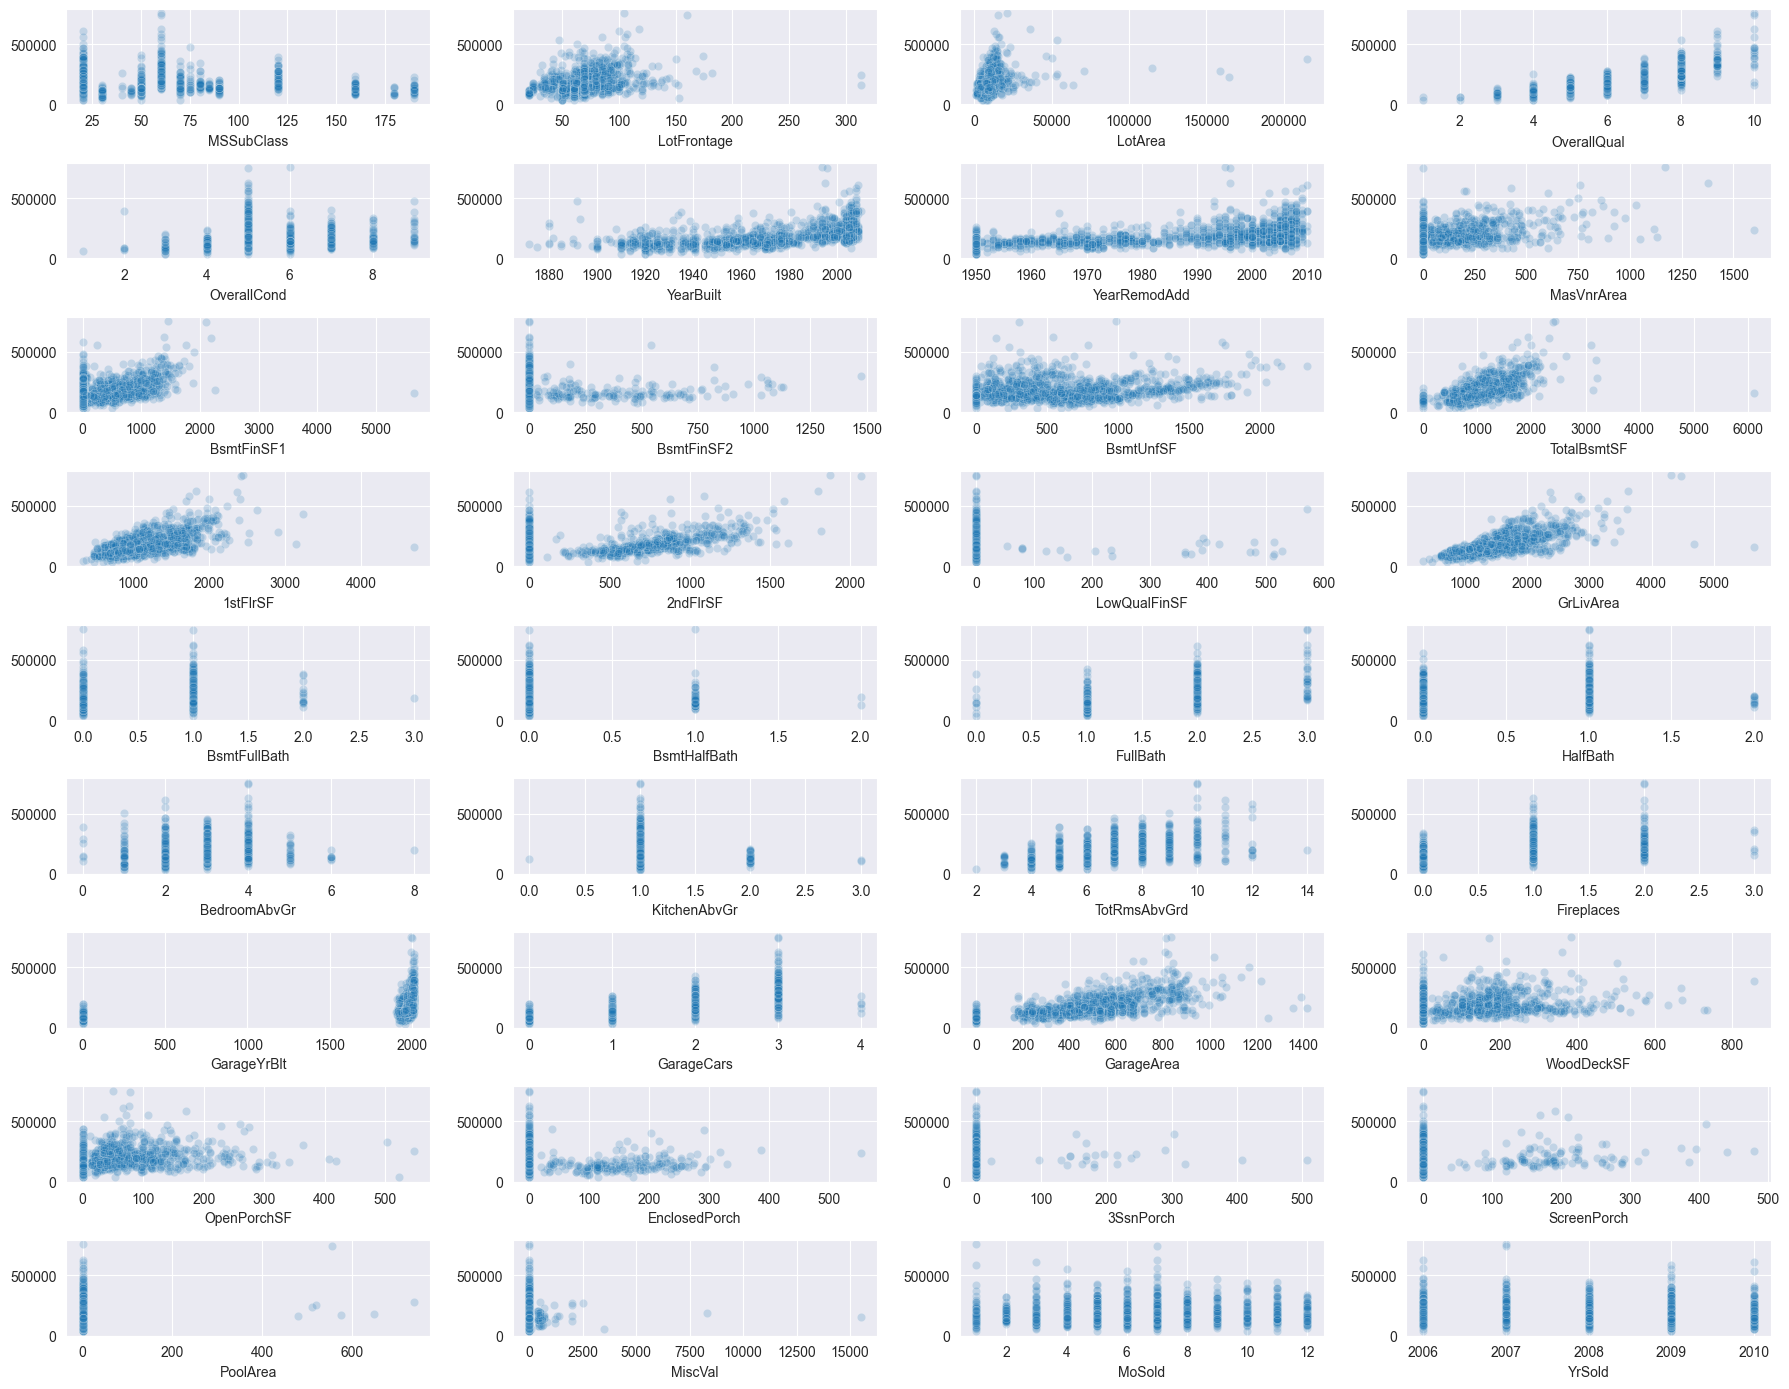

In [67]:
fig, ax = plt.subplots(9, 4, figsize=(18, 14))
for i, col in enumerate(numcols):
    # Calcular las coordenadas del subgráfico en la matriz
    x = i // 4
    y = i % 4
    # Trazar el gráfico de dispersión en el subgráfico correspondiente
    sc=sns.scatterplot(data=all, x=col, y='SalePrice', ax=ax[x, y], alpha=0.2)
    sc.set(ylabel=None)  
plt.tight_layout()
plt.show()

We got 4 likely features with outliers. Here we go!likely 

Outliers LotFrontage

In [68]:
print(all[all.LotFrontage > 300])

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
934           20       RL      313.000    27650   Pave  None      IR2   
1298          60       RL      313.000    63887   Pave  None      IR3   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
934          HLS    AllPub    Inside  ...        0   None  None        None   
1298         Bnk    AllPub    Corner  ...      480     Gd  None        None   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
934        0     11    2008        WD         Normal 242000.000  
1298       0      1    2008       New        Partial 160000.000  

[2 rows x 80 columns]


Outliers Bsmt families

In [69]:
print(all[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "SalePrice"]][all.BsmtFinSF1 > 5000])
print(all[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "SalePrice"]][all.BsmtFinSF2 > 1400])
print(all[["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "SalePrice"]][all.TotalBsmtSF > 6000])

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
1298    5644.000       0.000    466.000     6110.000 160000.000
      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
322       28.000    1474.000      0.000     1502.000 301000.000
1698     236.000    1526.000    262.000     2024.000        NaN
      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
1298    5644.000       0.000    466.000     6110.000 160000.000


Outliers 1stFlrSF

In [70]:
print(all[["1stFlrSF", "2ndFlrSF", "SalePrice"]][all["1stFlrSF"] > 4000])

      1stFlrSF  2ndFlrSF  SalePrice
1298      4692       950 160000.000
2549      5095         0        NaN


Outliers GrLivArea

In [71]:
print(all[["1stFlrSF", "GrLivArea", "SalePrice"]][(all["GrLivArea"] > 4000) & (all["SalePrice"] < 700000)])

      1stFlrSF  GrLivArea  SalePrice
523       3138       4676 184750.000
1298      4692       5642 160000.000


Droping identified outliers

In [72]:
all.drop([934, 1298, 523], axis=0, inplace=True)

Indentify outliers in object values

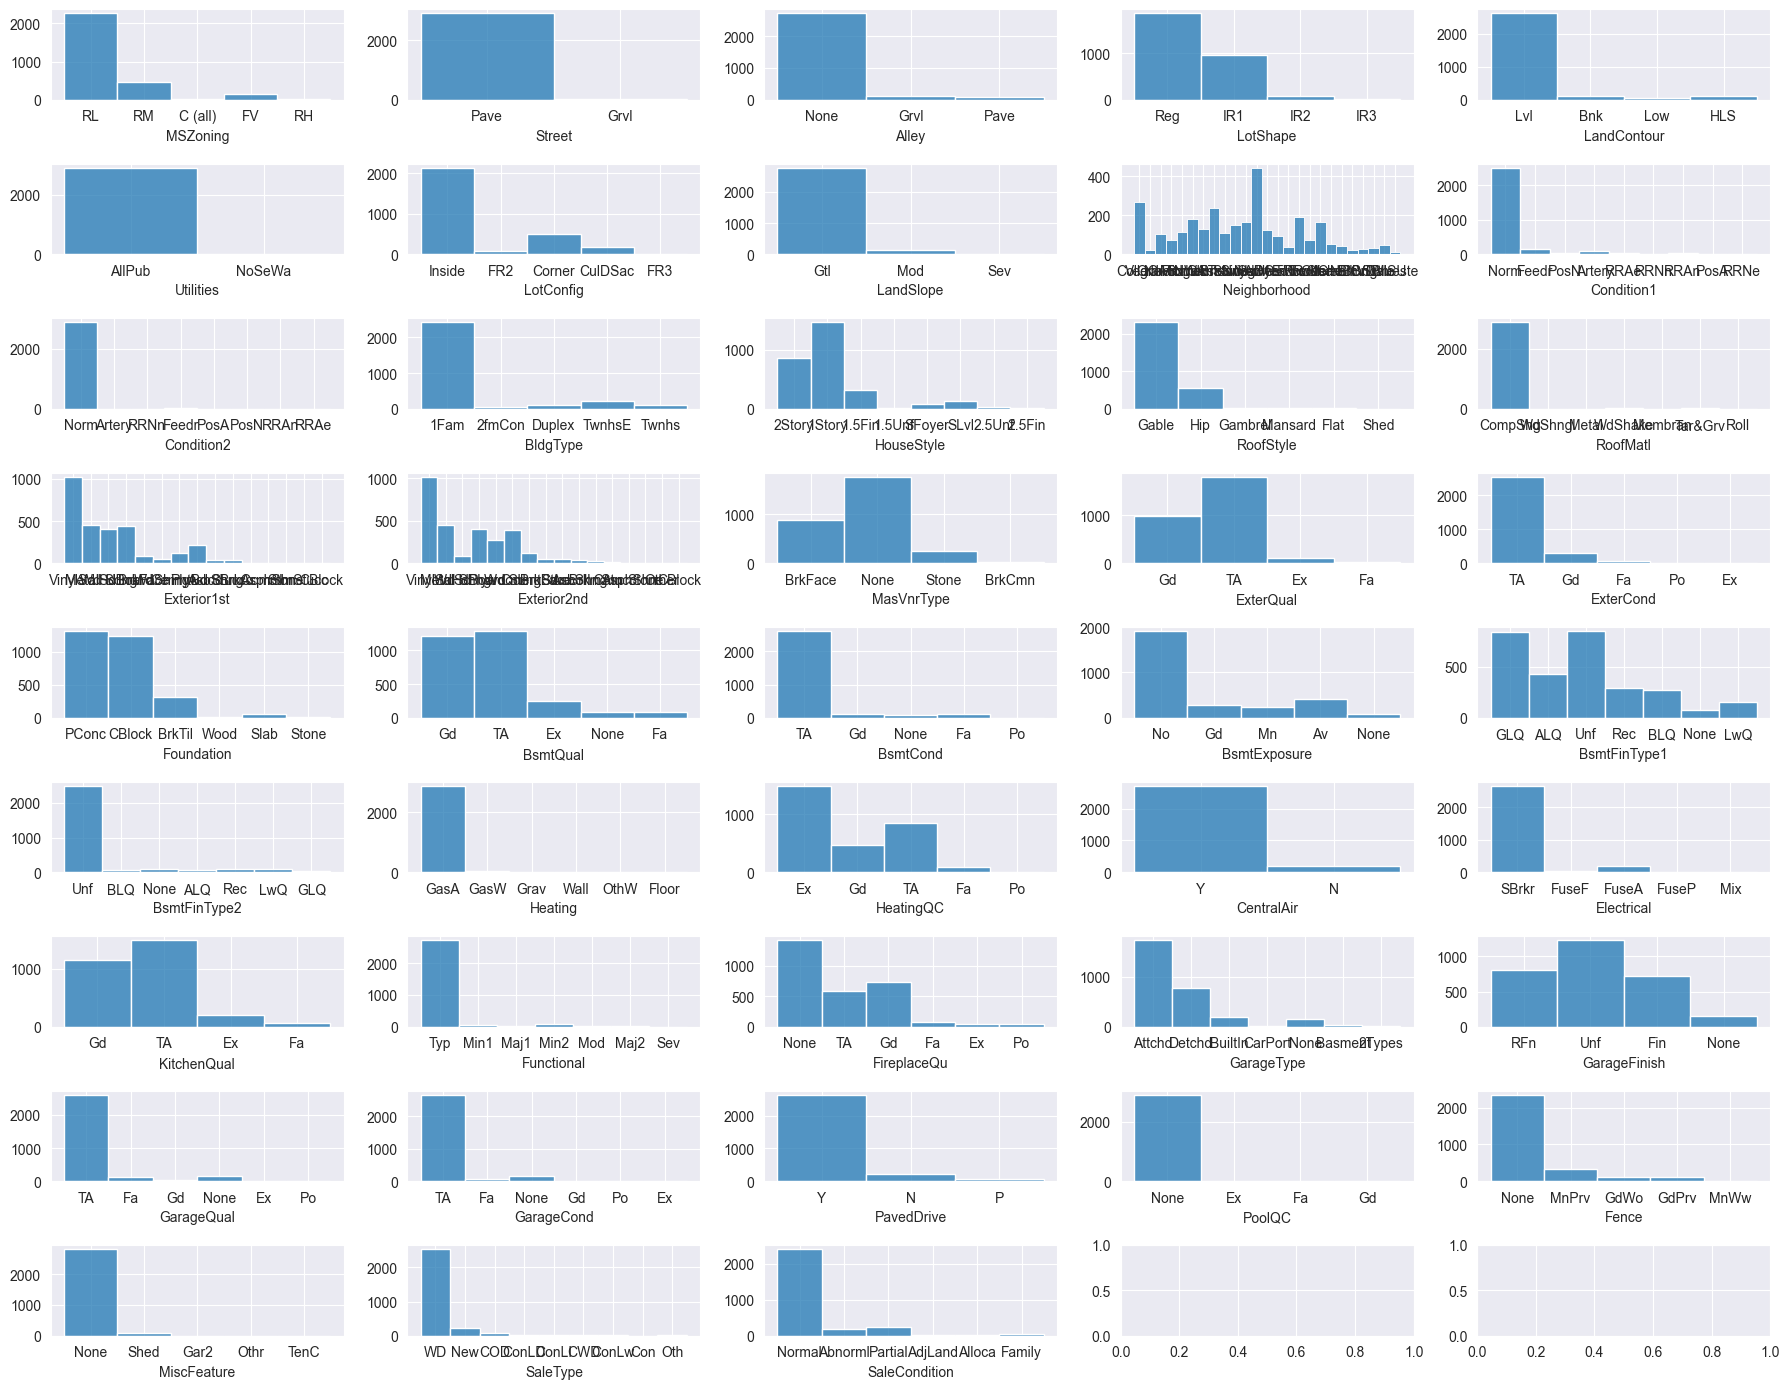

In [73]:
fig, ax = plt.subplots(9, 5, figsize=(18, 14))
for i, col in enumerate(objcols):
    x = i // 5
    y = i % 5
    hp=sns.histplot(data=all, x=col, ax=ax[x, y]) 
    hp.set(ylabel=None)
plt.tight_layout()
plt.show()

Indentify tpye data

In [74]:
print(all.info())
colchange = ["MSSubClass", "OverallQual", "OverallCond"]
yearfeature = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2916 non-null   int64  
 1   MSZoning       2916 non-null   object 
 2   LotFrontage    2916 non-null   float64
 3   LotArea        2916 non-null   int64  
 4   Street         2916 non-null   object 
 5   Alley          2916 non-null   object 
 6   LotShape       2916 non-null   object 
 7   LandContour    2916 non-null   object 
 8   Utilities      2916 non-null   object 
 9   LotConfig      2916 non-null   object 
 10  LandSlope      2916 non-null   object 
 11  Neighborhood   2916 non-null   object 
 12  Condition1     2916 non-null   object 
 13  Condition2     2916 non-null   object 
 14  BldgType       2916 non-null   object 
 15  HouseStyle     2916 non-null   object 
 16  OverallQual    2916 non-null   int64  
 17  OverallCond    2916 non-null   int64  
 18  YearBuilt    

In [75]:
all[colchange+yearfeature+["MoSold"]] = all[colchange+yearfeature+["MoSold"]].astype(object)


Cleaning data string and objects

In [76]:
numcols = all.select_dtypes(include=[np.number]).drop(["SalePrice"], axis=1)
objcols = all.select_dtypes(include=["object"])
for obj in objcols:
    print(all[obj].value_counts())

MSSubClass
20     1078
60      573
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64
MSZoning
RL         2265
RM          460
FV          139
C (all)      26
RH           26
Name: count, dtype: int64
Street
Pave    2904
Grvl      12
Name: count, dtype: int64
Alley
None    2718
Grvl     120
Pave      78
Name: count, dtype: int64
LotShape
Reg    1859
IR1     967
IR2      75
IR3      15
Name: count, dtype: int64
LandContour
Lvl    2622
HLS     119
Bnk     115
Low      60
Name: count, dtype: int64
Utilities
AllPub    2915
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     2131
Corner      510
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
LandSlope
Gtl    2776
Mod     124
Sev      16
Name: count, dtype: int64
Neighborhood
NAmes      442
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166


Duplicated datas

In [77]:
print(len(all.duplicated(keep=False)))
print(len(all.columns.duplicated(keep=False)))
print(all.duplicated(keep=False).sum())

2916
80
0


EXPLORE DATA ANALYSIS

Distribution SalePrice target

Histograma vs Normal SalePrice

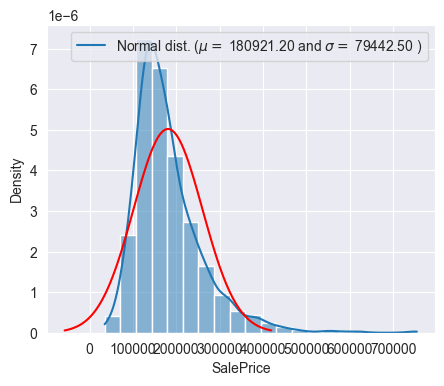

In [78]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis

mu, sigma = train['SalePrice'].mean(), train['SalePrice'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(train['SalePrice'], kde=True, stat='density', ax=ax, bins=20)
ax.plot(x, y, 'r-', label='Distribución normal')
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.show()

Probability plot

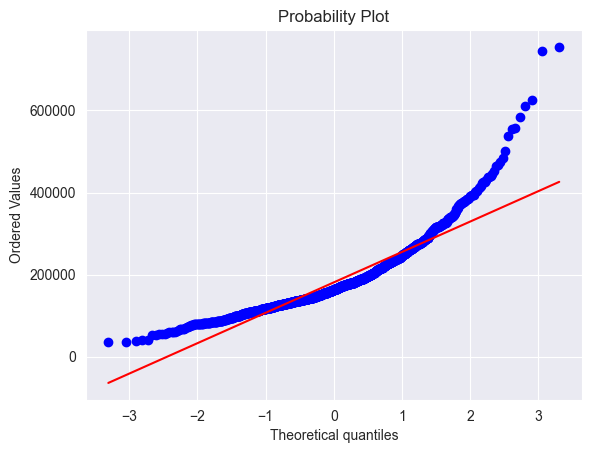

In [79]:
stats.probplot(train["SalePrice"], plot=plt)
plt.show()

CDF plot

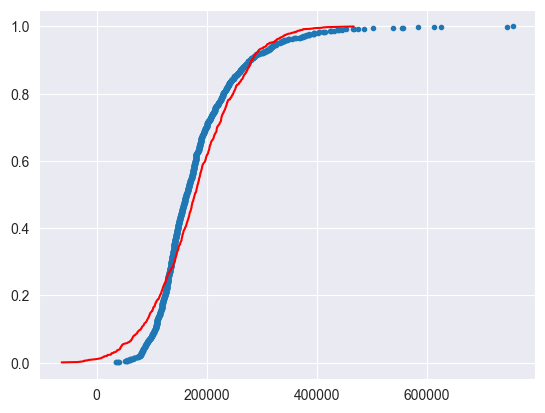

In [80]:
x = np.sort(train["SalePrice"])
y = np.arange(1, len(train["SalePrice"])+1) / len(train["SalePrice"])
z1 = np.sort(np.random.normal(mu, sigma, 1000))
z2 = np.arange(1, len(z1)+1) / len(z1)
plt.plot(x, y, marker=".", linestyle='none')
plt.plot(z1, z2, "r")
plt.show()

Skewness and Kurtois

In [81]:
skeww = stats.skew(train["SalePrice"])
kurt = kurtosis(train["SalePrice"])
print("Skewness: {:.3f}".format(skeww))
print("Kurotsis: {:.3f}".format(kurt))

Skewness: 1.881
Kurotsis: 6.510


Simulate transformations

Log SalePrice

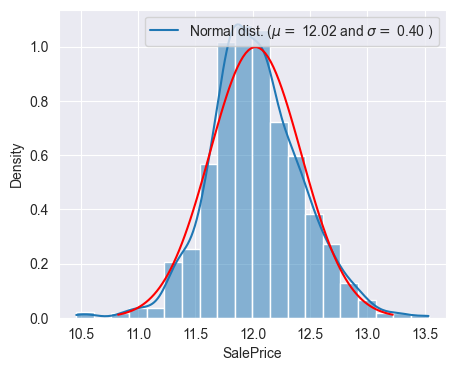

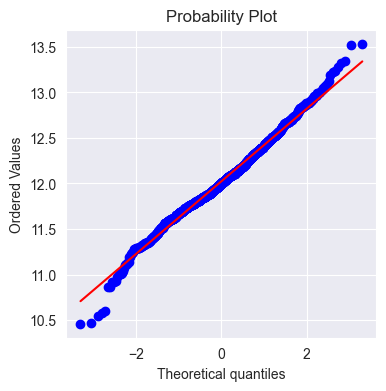

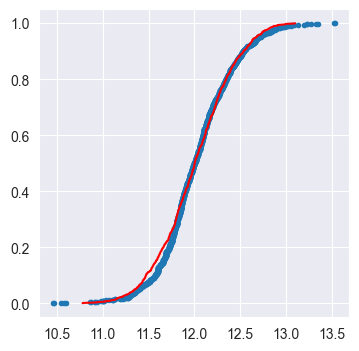

Skewness: 0.121
Kurotsis: 0.803


In [82]:
mu, sigma = np.log(train['SalePrice']).mean(), np.log(train['SalePrice']).std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(np.log(train['SalePrice']), kde=True, stat='density', ax=ax, bins=20)
ax.plot(x, y, 'r-', label='Distribución normal')
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig1, ax1 = plt.subplots(figsize=(4, 4))
stats.probplot(np.log(train['SalePrice']), plot=plt)

fig2, ax2 = plt.subplots(figsize=(4, 4))
x = np.sort(np.log(train['SalePrice']))
y = np.arange(1, len(np.log(train['SalePrice']))+1) / len(np.log(train['SalePrice']))
z1 = np.sort(np.random.normal(mu, sigma, 1000))
z2 = np.arange(1, len(z1)+1) / len(z1)
plt.plot(x, y, marker=".", linestyle='none')
plt.plot(z1, z2, "r")
plt.show()

plt.show()

skewp = stats.skew(np.log(train['SalePrice']))
kurtp = kurtosis(np.log(train['SalePrice']))
print("Skewness: {:.3f}".format(skewp))
print("Kurotsis: {:.3f}".format(kurtp))


Log1p SalePrice

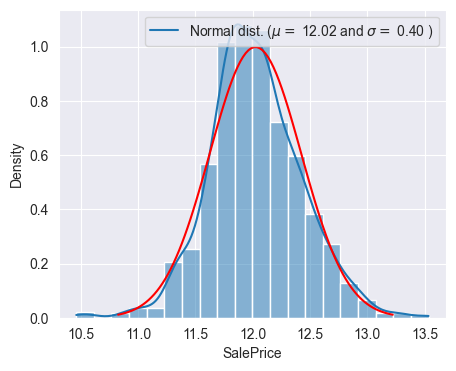

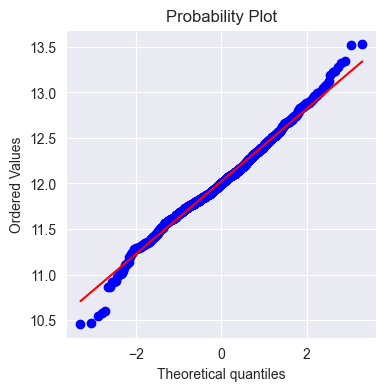

Skewness: 0.121
Kurotsis: 0.803


In [83]:
mu, sigma = np.log1p(train['SalePrice']).mean(), np.log1p(train['SalePrice']).std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(np.log1p(train['SalePrice']), kde=True, stat='density', ax=ax, bins=20)
ax.plot(x, y, 'r-', label='Distribución normal')
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig1, ax1 = plt.subplots(figsize=(4, 4))
stats.probplot(np.log1p(train['SalePrice']), plot=plt)

plt.show()

skew1p = stats.skew(np.log1p(train['SalePrice']))
kurt1p = kurtosis(np.log1p(train['SalePrice']))
print("Skewness: {:.3f}".format(skew1p))
print("Kurotsis: {:.3f}".format(kurt1p))


BoxCox SalePrice

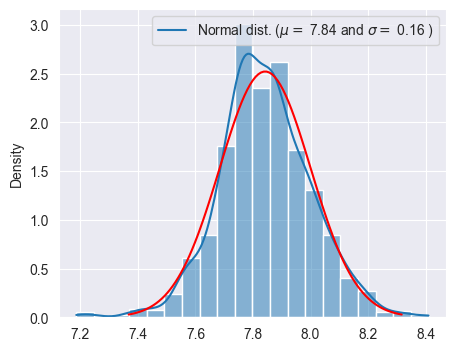

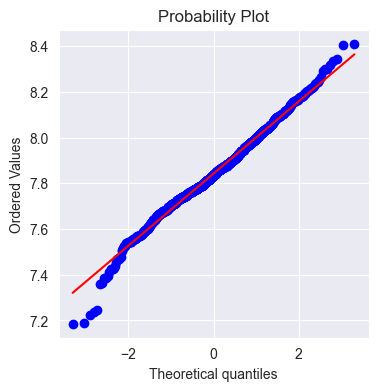

Skewness: -0.009
Kurotsis: 0.871
Valor labmda -0.077


In [84]:
from scipy.stats import boxcox

datab, lamb = boxcox(train['SalePrice'])

mu, sigma = datab.mean(), datab.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(datab, kde=True, stat='density', ax=ax, bins=20)
ax.plot(x, y, 'r-', label='Distribución normal')
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

fig1, ax1 = plt.subplots(figsize=(4, 4))
stats.probplot(datab, plot=plt)

plt.show()

skewb = stats.skew(datab)
kurtb = kurtosis(datab)
print("Skewness: {:.3f}".format(skewb))
print("Kurotsis: {:.3f}".format(kurtb))
print("Valor labmda {:.3f}".format(lamb.mean()))

Apply log transformation to target Saleprice

In [85]:
all["SalePrice"] = np.log(all["SalePrice"])

In [86]:
print(all.SalePrice.describe())

count   1457.000
mean      12.024
std        0.400
min       10.460
25%       11.775
50%       12.002
75%       12.274
max       13.534
Name: SalePrice, dtype: float64


Matrix Correlation again

<Axes: >

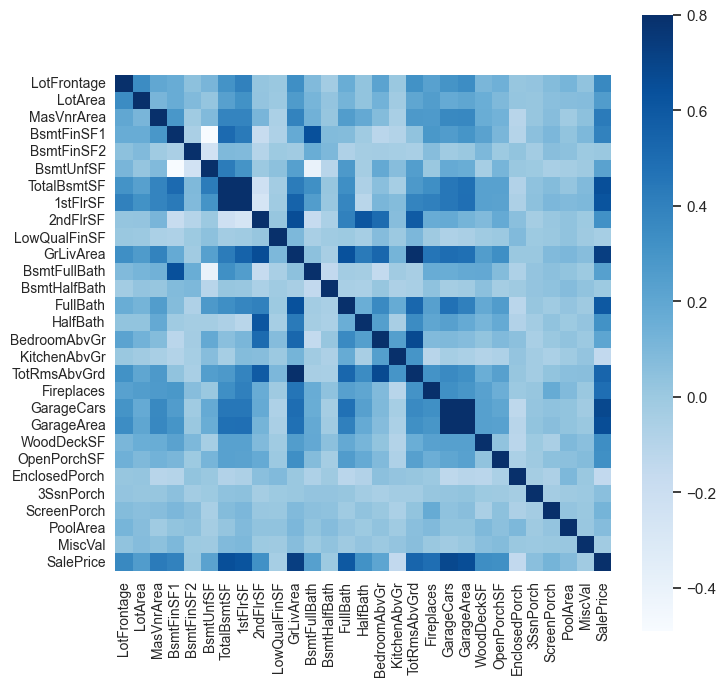

In [87]:
numcols = all.select_dtypes(include=[np.number])  # Mantener solo las columnas numéricas
corrmat = numcols.corr()
plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corrmat,vmax=0.8, cmap="Blues", square=True)

In [88]:
corr_list = corrmat['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
print(corr_list[corr_list>0.5])

GrLivArea      0.725
GarageCars     0.681
GarageArea     0.656
TotalBsmtSF    0.649
1stFlrSF       0.620
FullBath       0.596
TotRmsAbvGrd   0.537
Name: SalePrice, dtype: float64


In [89]:
print(numcols[corr_list[corr_list>0.5].index])

      GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  \
0          1710       2.000     548.000      856.000       856         2   
1          1262       2.000     460.000     1262.000      1262         2   
2          1786       2.000     608.000      920.000       920         2   
3          1717       3.000     642.000      756.000       961         1   
4          2198       3.000     836.000     1145.000      1145         2   
...         ...         ...         ...          ...       ...       ...   
2914       1092       0.000       0.000      546.000       546         1   
2915       1092       1.000     286.000      546.000       546         1   
2916       1224       2.000     576.000     1224.000      1224         1   
2917        970       0.000       0.000      912.000       970         1   
2918       2000       3.000     650.000      996.000       996         2   

      TotRmsAbvGrd  
0                8  
1                6  
2                6  
3  

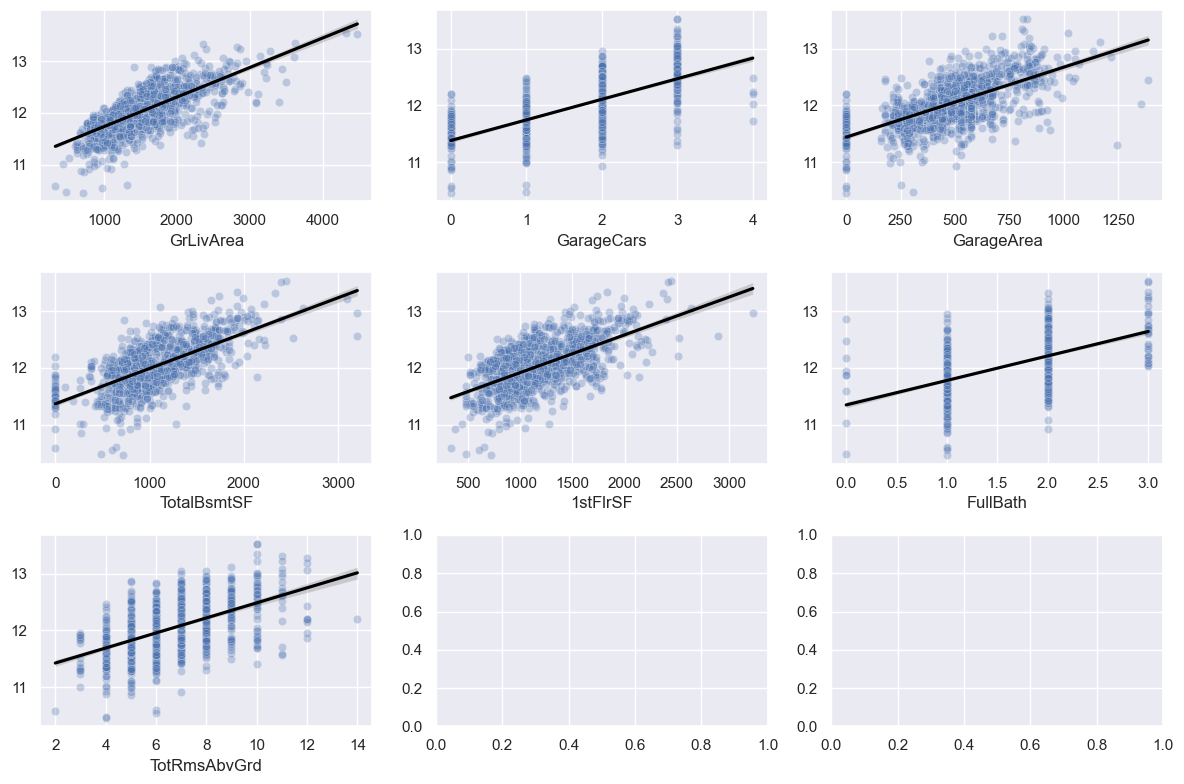

In [90]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
for i, col in enumerate(numcols[corr_list[corr_list>0.5].index]):
    # Calcular las coordenadas del subgráfico en la matriz
    x = i // 3
    y = i % 3
    # Trazar el gráfico de dispersión en el subgráfico correspondiente
    sc=sns.scatterplot(data=all, x=col, y='SalePrice', ax=ax[x, y], alpha=.3)
    sc.set(ylabel=None)  
    rg=sns.regplot(x = col, y = 'SalePrice', data = all, scatter=False, color='Black', ax=ax[x, y])
    rg.set(ylabel=None) 
plt.tight_layout()
plt.show()

Feature Engineering

In [91]:
all_features = all.drop(["SalePrice"], axis=1)
objcols = all_features.select_dtypes(include=["object"])
for obj in objcols:
    print(all[obj].value_counts())

MSSubClass
20     1078
60      573
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64
MSZoning
RL         2265
RM          460
FV          139
C (all)      26
RH           26
Name: count, dtype: int64
Street
Pave    2904
Grvl      12
Name: count, dtype: int64
Alley
None    2718
Grvl     120
Pave      78
Name: count, dtype: int64
LotShape
Reg    1859
IR1     967
IR2      75
IR3      15
Name: count, dtype: int64
LandContour
Lvl    2622
HLS     119
Bnk     115
Low      60
Name: count, dtype: int64
Utilities
AllPub    2915
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     2131
Corner      510
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
LandSlope
Gtl    2776
Mod     124
Sev      16
Name: count, dtype: int64
Neighborhood
NAmes      442
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166


Creating new features

Bathrooms

In [92]:
all["TotalBath"] = all.FullBath + all.BsmtFullBath + 0.5*all.HalfBath + 0.5*all.BsmtHalfBath
print(corrmat.loc[["FullBath", "BsmtFullBath", "HalfBath", "BsmtHalfBath"], "SalePrice"])
print(all[["TotalBath", "SalePrice"]].corr())

FullBath        0.596
BsmtFullBath    0.237
HalfBath        0.315
BsmtHalfBath   -0.005
Name: SalePrice, dtype: float64
           TotalBath  SalePrice
TotalBath      1.000      0.676
SalePrice      0.676      1.000


Overall

In [93]:
all["TotalOverall"] = all.OverallCond + all.OverallQual
print(all[["OverallCond", "OverallQual", "SalePrice"]].corr())
print(all[["TotalOverall", "SalePrice"]].corr())

             OverallCond  OverallQual  SalePrice
OverallCond        1.000       -0.093     -0.038
OverallQual       -0.093        1.000      0.821
SalePrice         -0.038        0.821      1.000
              TotalOverall  SalePrice
TotalOverall         1.000      0.644
SalePrice            0.644      1.000


Years

In [94]:
all[yearfeature] = all[yearfeature].astype("int64")
print(all[yearfeature].info())
all["BuiltAge"] = all["YrSold"] - all["YearBuilt"]
all["RemodAge"] = all["YearRemodAdd"] - all["YearBuilt"]
all["New"] = all["BuiltAge"].apply(lambda x: 1 if x==0 else 0)
all["Remod"] = all["RemodAge"] .apply(lambda x: 1 if x>0 else 0)
print(all["New"].value_counts())
print(all["Remod"].value_counts())
print(all[yearfeature+["SalePrice"]].corr())
print(all[["BuiltAge", "RemodAge", "New", "Remod", "SalePrice"]].corr())
all[yearfeature] = all[yearfeature].astype(object)

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     2916 non-null   int64
 1   YearRemodAdd  2916 non-null   int64
 2   GarageYrBlt   2916 non-null   int64
 3   YrSold        2916 non-null   int64
dtypes: int64(4)
memory usage: 113.9 KB
None
New
0    2802
1     114
Name: count, dtype: int64
Remod
0    1560
1    1356
Name: count, dtype: int64
              YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  SalePrice
YearBuilt         1.000         0.612        0.260  -0.012      0.587
YearRemodAdd      0.612         1.000        0.146   0.033      0.566
GarageYrBlt       0.260         0.146        1.000  -0.010      0.349
YrSold           -0.012         0.033       -0.010   1.000     -0.037
SalePrice         0.587         0.566        0.349  -0.037      1.000
           BuiltAge  RemodAge    New  Remod  SalePrice
BuiltAge      1.000     0.728 -

Total area in square foot

In [95]:
all["TotalAreaSF"] = all["TotalBsmtSF"] + all["1stFlrSF"] + all["2ndFlrSF"]
print(all[["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "SalePrice"]].corr())
print(all[["TotalAreaSF", "SalePrice"]].corr())
print(all[["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "TotalBsmtSF", "GrLivArea"]].head())

             TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice
TotalBsmtSF        1.000     0.795    -0.222      0.649
1stFlrSF           0.795     1.000    -0.264      0.620
2ndFlrSF          -0.222    -0.264     1.000      0.321
SalePrice          0.649     0.620     0.321      1.000
             TotalAreaSF  SalePrice
TotalAreaSF        1.000      0.825
SalePrice          0.825      1.000
   1stFlrSF  2ndFlrSF  LowQualFinSF  TotalBsmtSF  GrLivArea
0       856       854             0      856.000       1710
1      1262         0             0     1262.000       1262
2       920       866             0      920.000       1786
3       961       756             0      756.000       1717
4      1145      1053             0     1145.000       2198


Total porch in square foot

In [96]:
all["TotalPorchSF"] = all["3SsnPorch"] + all["OpenPorchSF"] + all["ScreenPorch"] + all["EnclosedPorch"]
print(all[["3SsnPorch", "OpenPorchSF", "ScreenPorch", "EnclosedPorch", "SalePrice"]].corr())
print(all[["TotalPorchSF", "SalePrice"]].corr())

               3SsnPorch  OpenPorchSF  ScreenPorch  EnclosedPorch  SalePrice
3SsnPorch          1.000       -0.009       -0.030         -0.033      0.055
OpenPorchSF       -0.009        1.000        0.049         -0.059      0.326
ScreenPorch       -0.030        0.049        1.000         -0.064      0.121
EnclosedPorch     -0.033       -0.059       -0.064          1.000     -0.149
SalePrice          0.055        0.326        0.121         -0.149      1.000
              TotalPorchSF  SalePrice
TotalPorchSF         1.000      0.196
SalePrice            0.196      1.000


Has something

Drop features: Street, Utilities, PoolQC

In [97]:
all.drop(["Street", "Utilities", "PoolQC"], axis=1, inplace=True)
print(len(all.columns))

85


<Axes: >

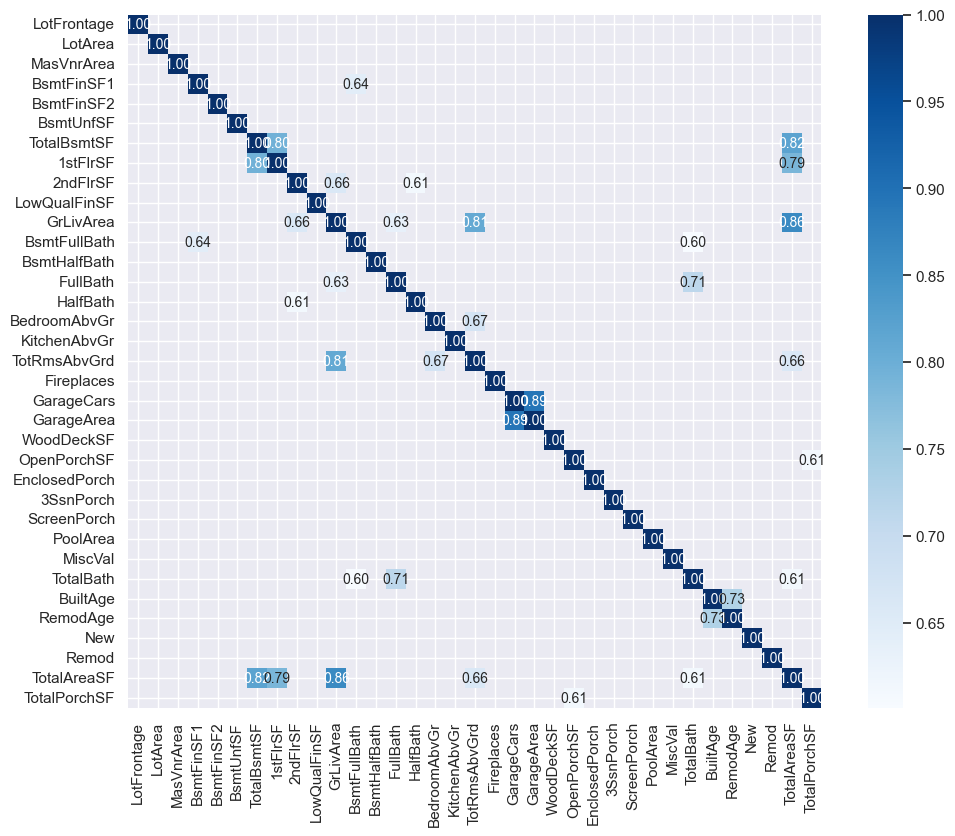

In [98]:
all_features = all.drop(["SalePrice"], axis=1)
corrmatfeatures = all_features.select_dtypes(include=[np.number]).corr()
plt.subplots(figsize=(12,9))
sns.set(font_scale=1)
sns.heatmap(corrmatfeatures[abs(corrmatfeatures)>0.6],vmax=1, cmap="Blues", square=True, annot=True, fmt='.2f', annot_kws={'size': 10})

Drop features: GarageArea, TotRmsAbvGrd, TotalBsmtSF.

In [99]:
all.drop(["GarageArea", "TotRmsAbvGrd", "TotalBsmtSF"], axis=1, inplace=True)
print(len(all.columns))

82


In [100]:
print(len(all.columns))

82


Skewed Features

In [101]:
numfeatures = all.select_dtypes(include=[np.number]).drop(["SalePrice"], axis=1)
skewed_numcols = numfeatures.apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_numcols)

MiscVal         21.936
PoolArea        17.686
LotArea         13.140
LowQualFinSF    12.082
3SsnPorch       11.370
New              4.756
KitchenAbvGr     4.300
BsmtFinSF2       4.144
EnclosedPorch    4.002
ScreenPorch      3.944
BsmtHalfBath     3.929
MasVnrArea       2.621
OpenPorchSF      2.529
TotalPorchSF     2.244
RemodAge         2.065
WoodDeckSF       1.844
1stFlrSF         1.259
GrLivArea        1.070
TotalAreaSF      1.009
BsmtFinSF1       0.980
BsmtUnfSF        0.919
2ndFlrSF         0.861
LotFrontage      0.736
Fireplaces       0.726
HalfBath         0.696
BsmtFullBath     0.623
BuiltAge         0.598
TotalBath        0.487
BedroomAbvGr     0.327
FullBath         0.166
Remod            0.140
GarageCars      -0.221
dtype: float64


Using Boxcox1p to features transform

In [102]:
from scipy.special import boxcox1p
a = []
for col in skewed_numcols[abs(skewed_numcols)>0.70].index:
    all[col] = boxcox1p(all[col], 0.10)

Label Encoding categorical features

In [103]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', "TotalOverall")
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all[c].values)) 
    all[c] = lbl.transform(list(all[c].values))

Encode categorical features

In [104]:
print(all.shape)
print(all.head(5))
all = pd.get_dummies(all).reset_index(drop=True)
print(all.shape)
print(all.SalePrice.tail(5))

(2916, 82)
   MSSubClass MSZoning  LotFrontage  LotArea  Alley  LotShape LandContour  \
0           5       RL        5.204   14.700      1         3         Lvl   
1           0       RL        5.518   15.017      1         3         Lvl   
2           5       RL        5.272   15.417      1         0         Lvl   
3           6       RL        5.085   15.004      1         0         Lvl   
4           5       RL        5.593   16.026      1         0         Lvl   

  LotConfig  LandSlope Neighborhood  ... SaleCondition SalePrice TotalBath  \
0    Inside          0      CollgCr  ...        Normal    12.248     3.500   
1       FR2          0      Veenker  ...        Normal    12.109     2.500   
2    Inside          0      CollgCr  ...        Normal    12.317     3.500   
3    Corner          0      Crawfor  ...       Abnorml    11.849     2.000   
4       FR2          0      NoRidge  ...        Normal    12.429     3.500   

  TotalOverall BuiltAge  RemodAge   New Remod TotalAreaSF

Remove columns duplicated

In [105]:
all = all.loc[:,~all.columns.duplicated()]
print(all.shape)

(2916, 511)


Recreate training and test sets

In [106]:
train = all[~pd.isna(all["SalePrice"])]
test = all[pd.isna(all["SalePrice"])].drop("SalePrice", axis=1)

In [108]:
#train.to_csv("C:/Users/kevin/proyectos/house_prices/data/train_new.csv")
#test.to_csv("C:/Users/kevin/proyectos/house_prices/data/test_new.csv")